/home/ldy/miniconda3/envs/BCI/lib/python3.10/site-packages/braindecode/models/base.py:23: UserWarning: EEGNetv4: 'in_chans' is depreciated. Use 'n_chans' instead.
  warnings.warn(
/home/ldy/miniconda3/envs/BCI/lib/python3.10/site-packages/braindecode/models/base.py:23: UserWarning: EEGNetv4: 'n_classes' is depreciated. Use 'n_outputs' instead.
  warnings.warn(
/home/ldy/miniconda3/envs/BCI/lib/python3.10/site-packages/braindecode/models/base.py:23: UserWarning: EEGNetv4: 'input_window_samples' is depreciated. Use 'n_times' instead.
  warnings.warn(


number of parameters: 1186833
self.subjects ['sub-01']
exclude_subject None


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.


Data tensor shape: torch.Size([200, 63, 250]), label tensor shape: torch.Size([200]), text length: 200, image length: 200


Epoch 1/1 - Test Loss: 1.3729, Test Accuracy: 0.1800, Top5 Accuracy: 0.4500
Epoch 1/1 - v2 Accuracy:0.935 - v4 Accuracy:0.845 - v10 Accuracy:0.74


Results saved to ./generation_metric_outputs/EEGNetv4_Encoder_sub-01.csv
self.subjects ['sub-02']
exclude_subject None
Data tensor shape: torch.Size([200, 63, 250]), label tensor shape: torch.Size([200]), text length: 200, image length: 200


Epoch 1/1 - Test Loss: 1.8699, Test Accuracy: 0.1200, Top5 Accuracy: 0.3750
Epoch 1/1 - v2 Accuracy:0.865 - v4 Accuracy:0.765 - v10 Accuracy:0.56


Results saved to ./generation_metric_outputs/EEGNetv4_Encoder_sub-02.csv
self.subjects ['sub-03']
exclude_subject None
Data tensor shape: torch.Size([200, 63, 250]), label tensor shape: torch.Size([200]), text length: 200, image length: 200


Epoch 1/1 - Test Loss: 1.4344, Test Accuracy: 0.2250, Top5 Accuracy: 0.5700
Epoch 1/1 - v2 Accuracy:0.975 - v4 Accuracy:0.925 - v10 Accuracy:0.755


Results saved to ./generation_metric_outputs/EEGNetv4_Encoder_sub-03.csv
self.subjects ['sub-04']
exclude_subject None
Data tensor shape: torch.Size([200, 63, 250]), label tensor shape: torch.Size([200]), text length: 200, image length: 200


Epoch 1/1 - Test Loss: 1.2592, Test Accuracy: 0.2350, Top5 Accuracy: 0.5400
Epoch 1/1 - v2 Accuracy:0.935 - v4 Accuracy:0.855 - v10 Accuracy:0.73


Results saved to ./generation_metric_outputs/EEGNetv4_Encoder_sub-04.csv
self.subjects ['sub-05']
exclude_subject None
Data tensor shape: torch.Size([200, 63, 250]), label tensor shape: torch.Size([200]), text length: 200, image length: 200


Epoch 1/1 - Test Loss: 1.3372, Test Accuracy: 0.1400, Top5 Accuracy: 0.3300
Epoch 1/1 - v2 Accuracy:0.9 - v4 Accuracy:0.79 - v10 Accuracy:0.58


Results saved to ./generation_metric_outputs/EEGNetv4_Encoder_sub-05.csv
self.subjects ['sub-06']
exclude_subject None
Data tensor shape: torch.Size([200, 63, 250]), label tensor shape: torch.Size([200]), text length: 200, image length: 200


Epoch 1/1 - Test Loss: 1.8131, Test Accuracy: 0.1700, Top5 Accuracy: 0.3800
Epoch 1/1 - v2 Accuracy:0.93 - v4 Accuracy:0.81 - v10 Accuracy:0.59


Results saved to ./generation_metric_outputs/EEGNetv4_Encoder_sub-06.csv
self.subjects ['sub-07']
exclude_subject None
Data tensor shape: torch.Size([200, 63, 250]), label tensor shape: torch.Size([200]), text length: 200, image length: 200


Epoch 1/1 - Test Loss: 1.8722, Test Accuracy: 0.2400, Top5 Accuracy: 0.5950
Epoch 1/1 - v2 Accuracy:0.92 - v4 Accuracy:0.875 - v10 Accuracy:0.735


Results saved to ./generation_metric_outputs/EEGNetv4_Encoder_sub-07.csv
self.subjects ['sub-08']
exclude_subject None
Data tensor shape: torch.Size([200, 63, 250]), label tensor shape: torch.Size([200]), text length: 200, image length: 200


Epoch 1/1 - Test Loss: 2.1928, Test Accuracy: 0.2650, Top5 Accuracy: 0.6150
Epoch 1/1 - v2 Accuracy:0.96 - v4 Accuracy:0.92 - v10 Accuracy:0.785


Results saved to ./generation_metric_outputs/EEGNetv4_Encoder_sub-08.csv
self.subjects ['sub-09']
exclude_subject None
Data tensor shape: torch.Size([200, 63, 250]), label tensor shape: torch.Size([200]), text length: 200, image length: 200


Epoch 1/1 - Test Loss: 1.7339, Test Accuracy: 0.1150, Top5 Accuracy: 0.3750
Epoch 1/1 - v2 Accuracy:0.845 - v4 Accuracy:0.745 - v10 Accuracy:0.575


Results saved to ./generation_metric_outputs/EEGNetv4_Encoder_sub-09.csv
self.subjects ['sub-10']
exclude_subject None
Data tensor shape: torch.Size([200, 63, 250]), label tensor shape: torch.Size([200]), text length: 200, image length: 200


Epoch 1/1 - Test Loss: 2.2619, Test Accuracy: 0.2200, Top5 Accuracy: 0.5100
Epoch 1/1 - v2 Accuracy:0.945 - v4 Accuracy:0.87 - v10 Accuracy:0.665


Results saved to ./generation_metric_outputs/EEGNetv4_Encoder_sub-10.csv


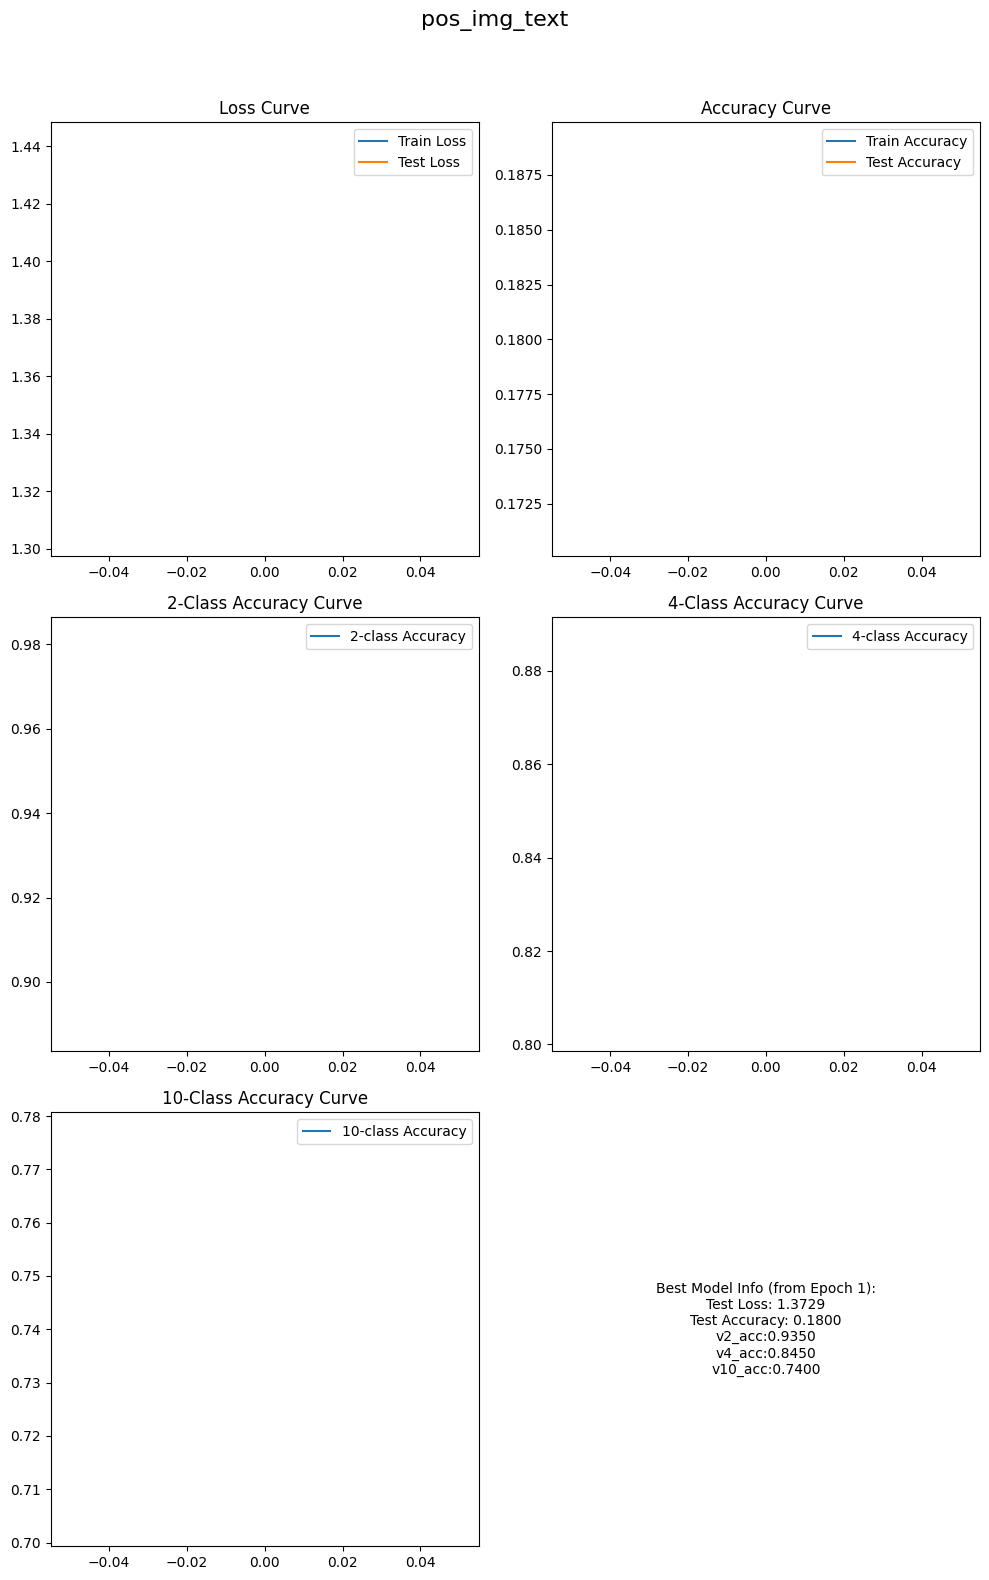

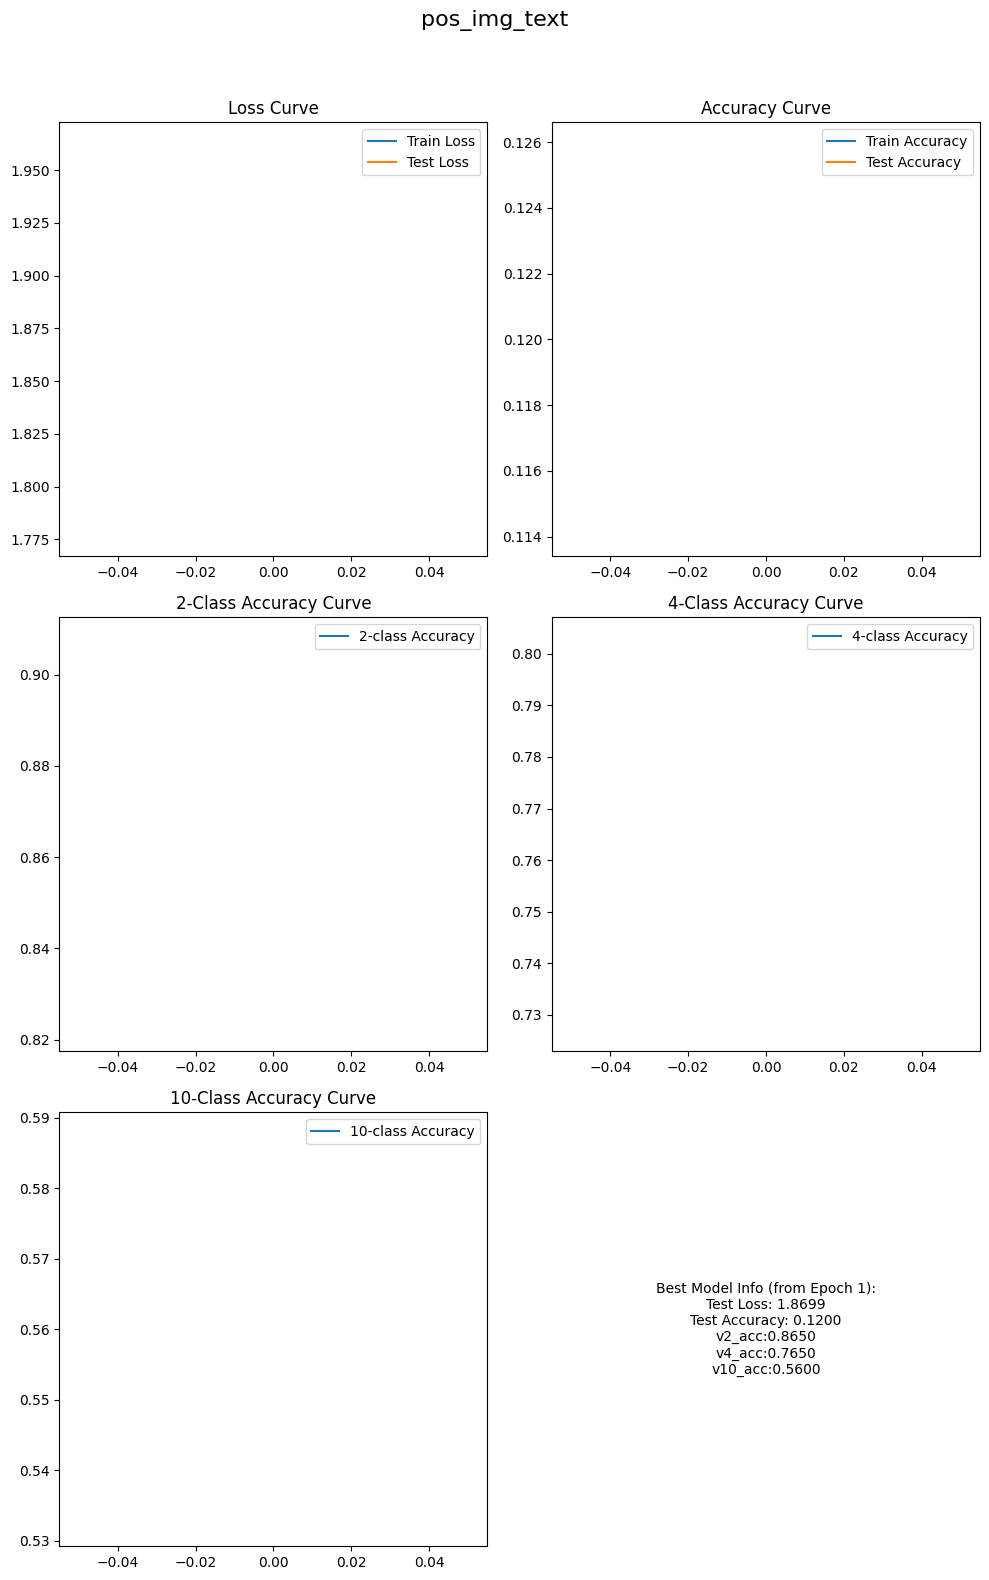

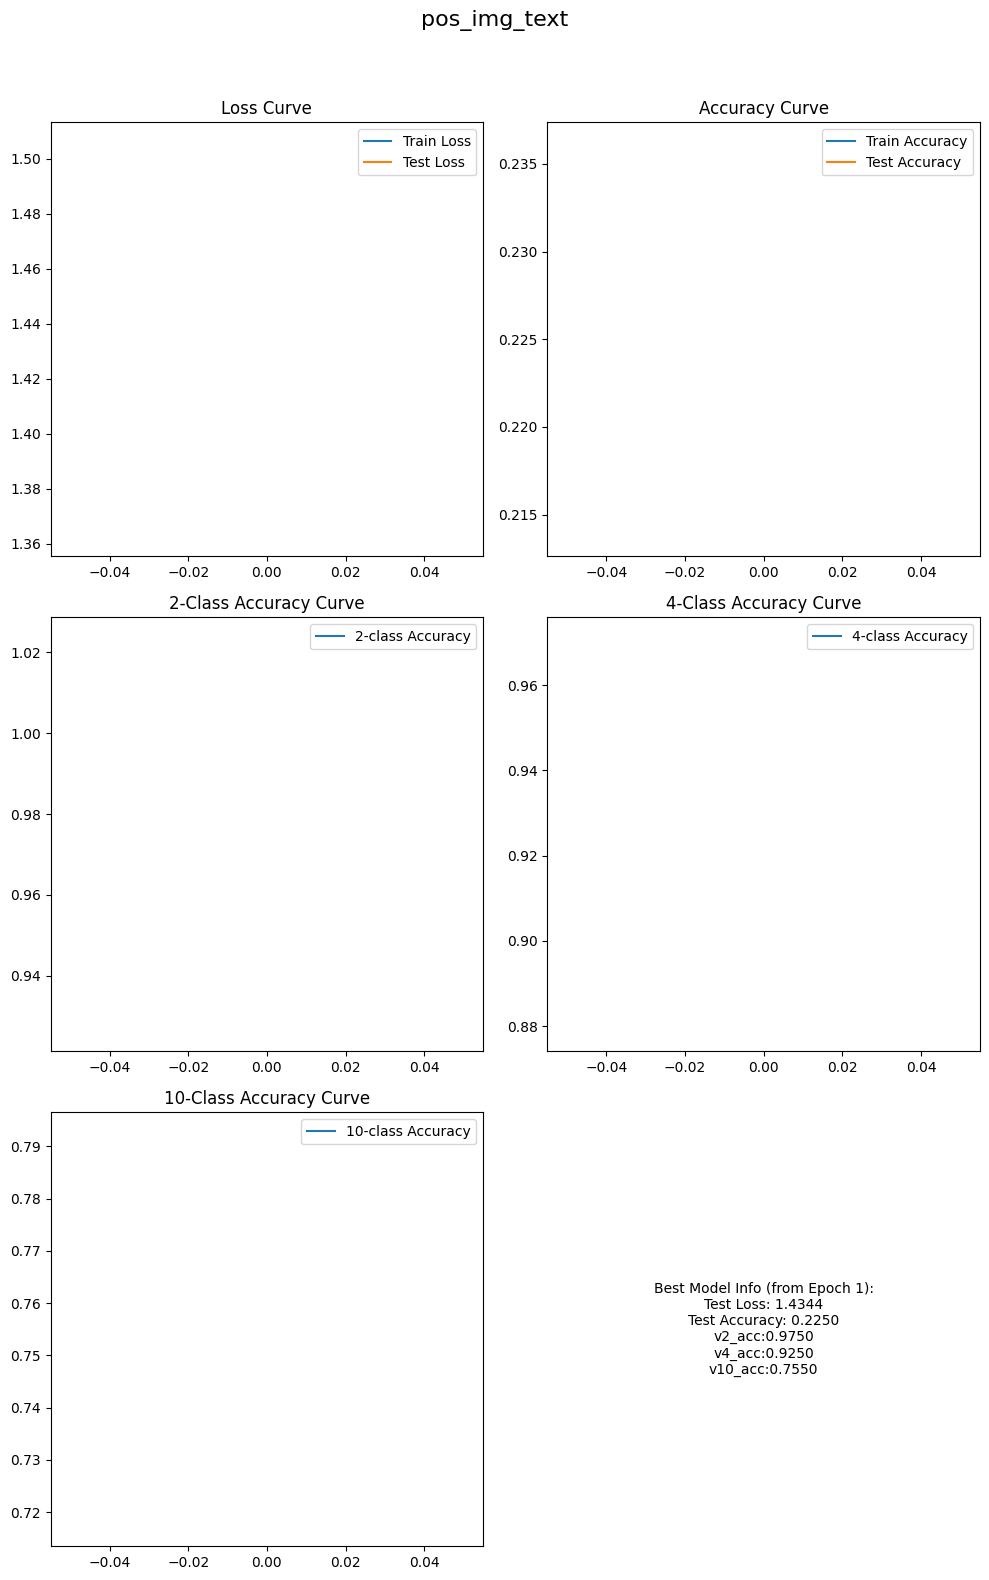

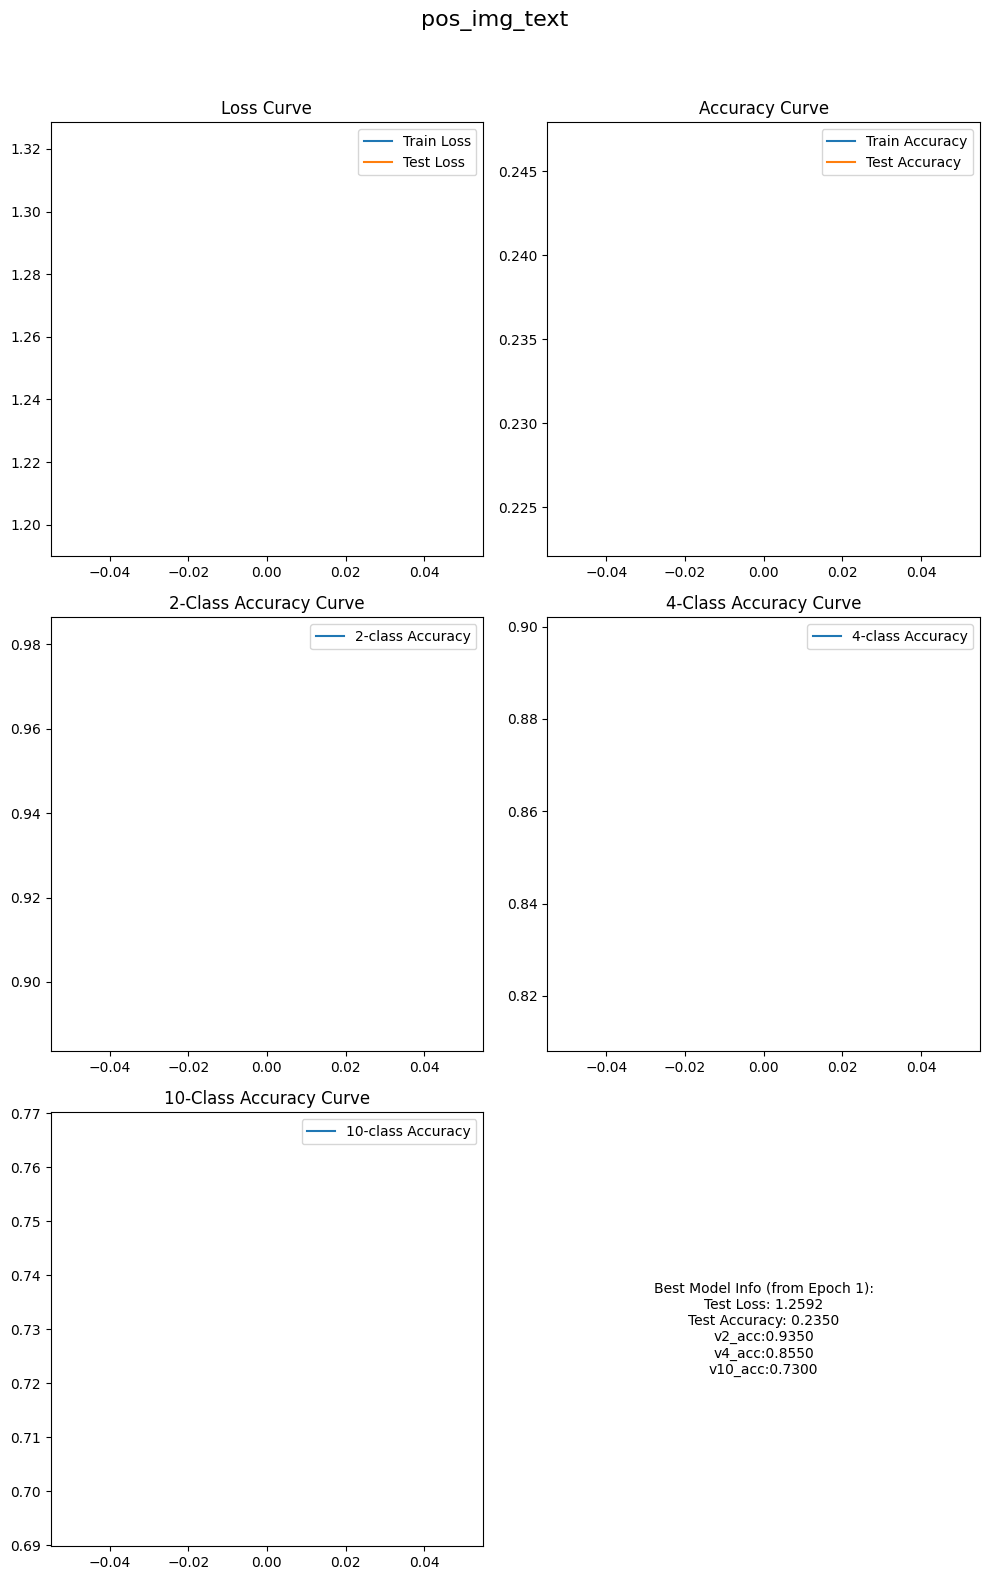

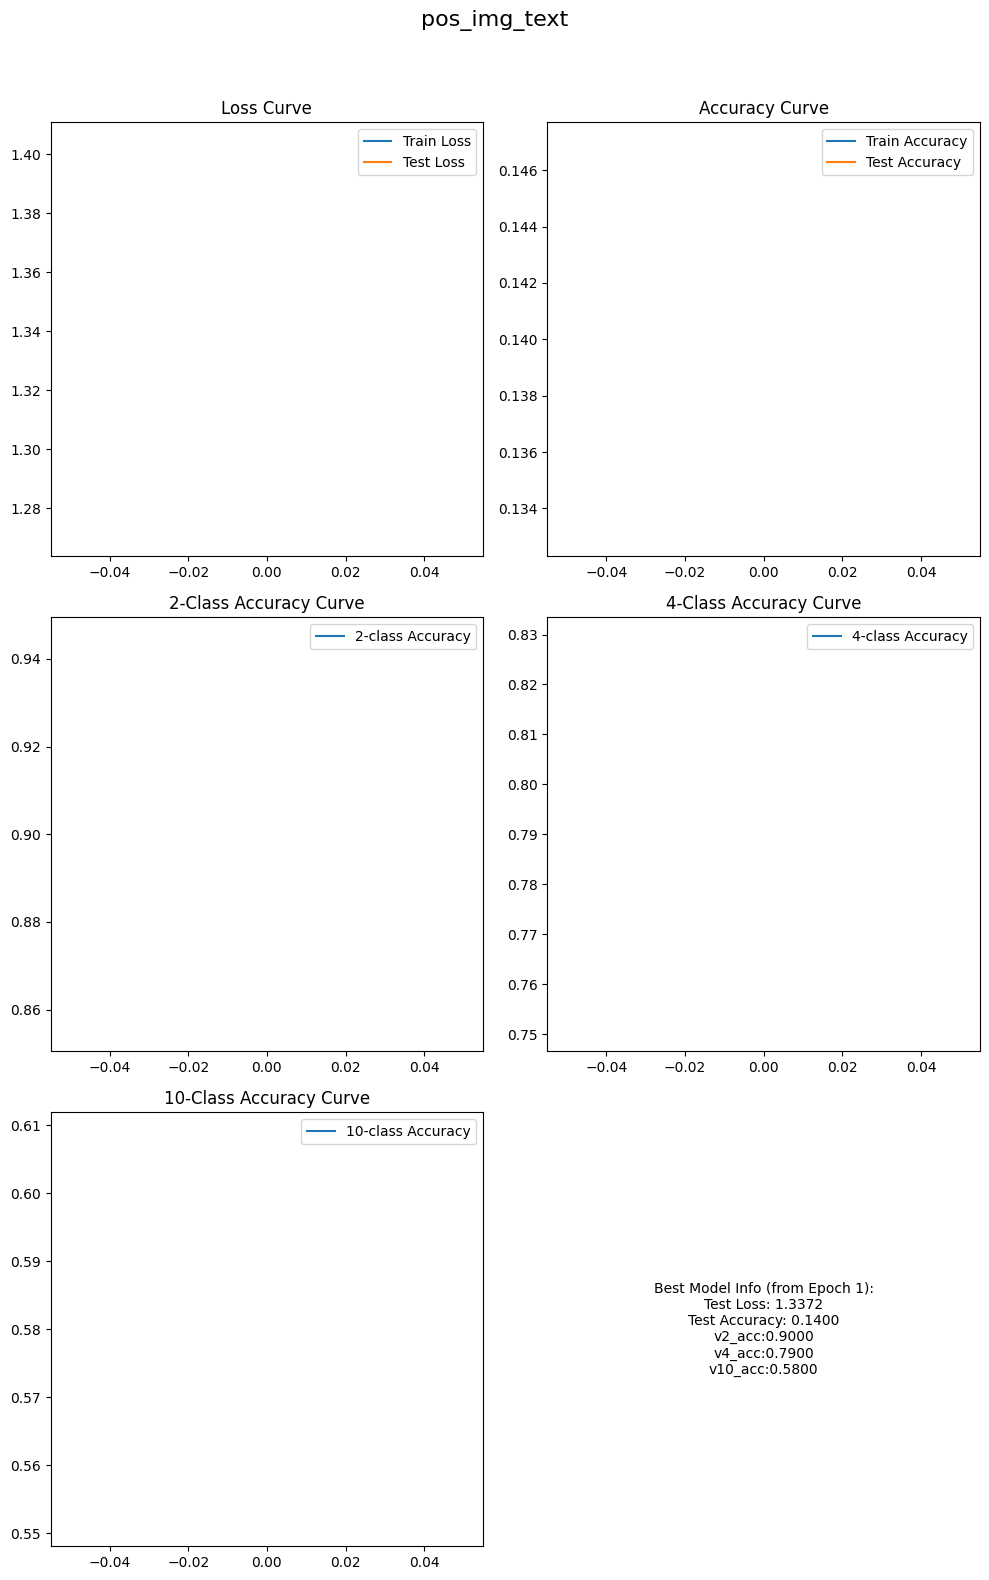

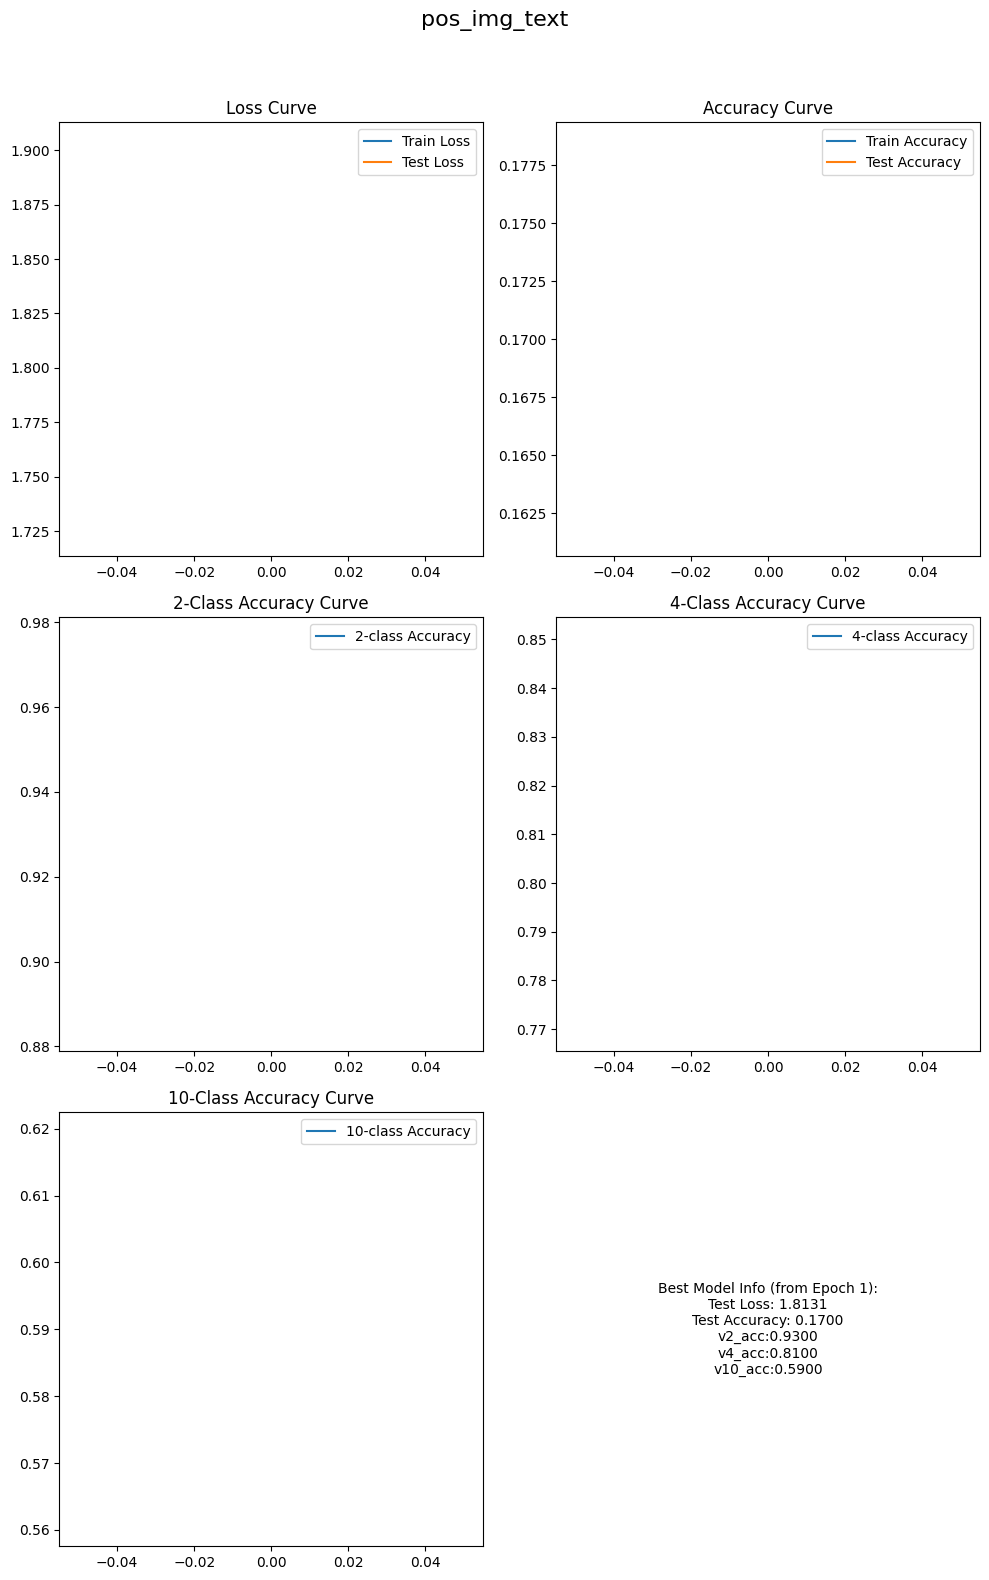

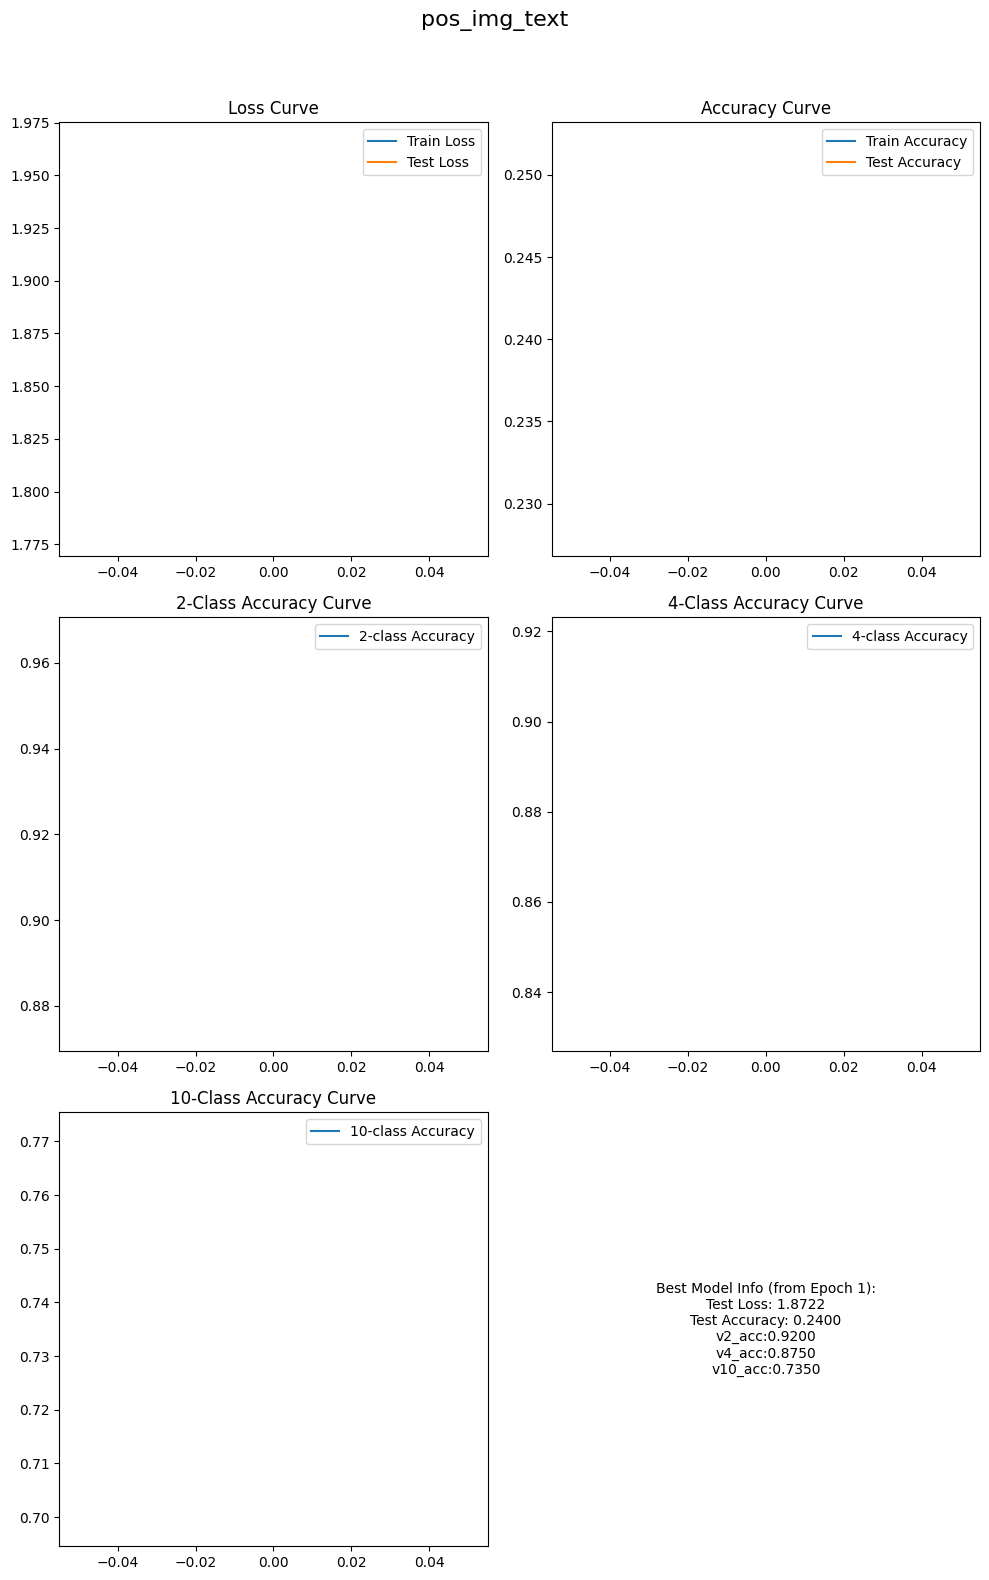

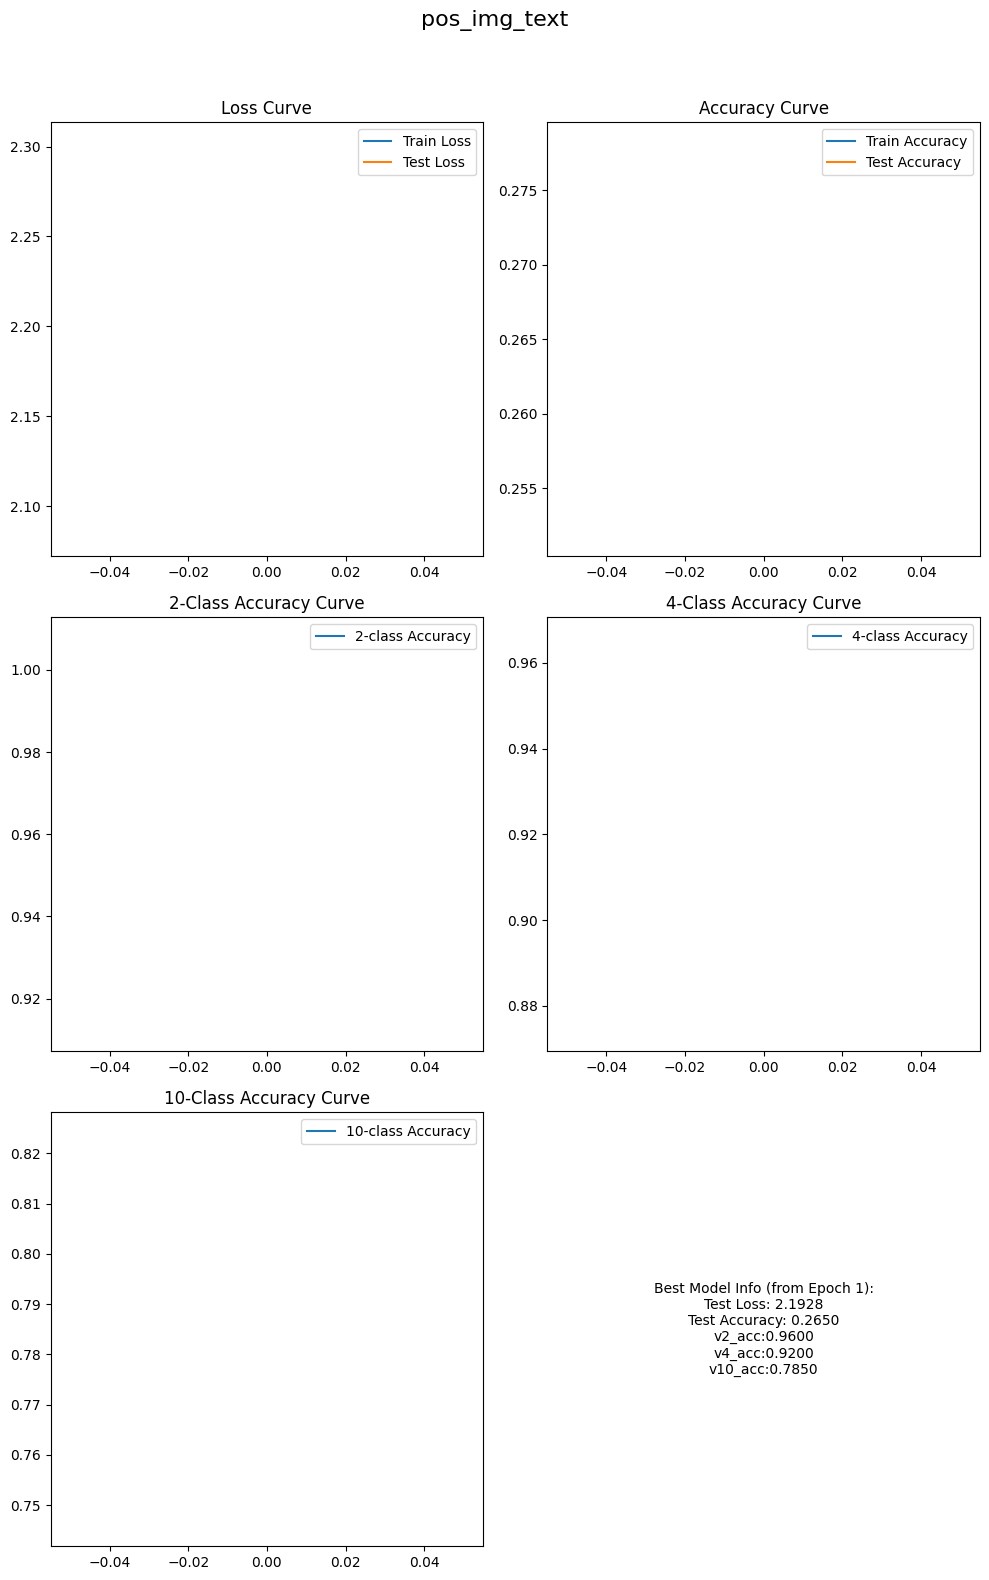

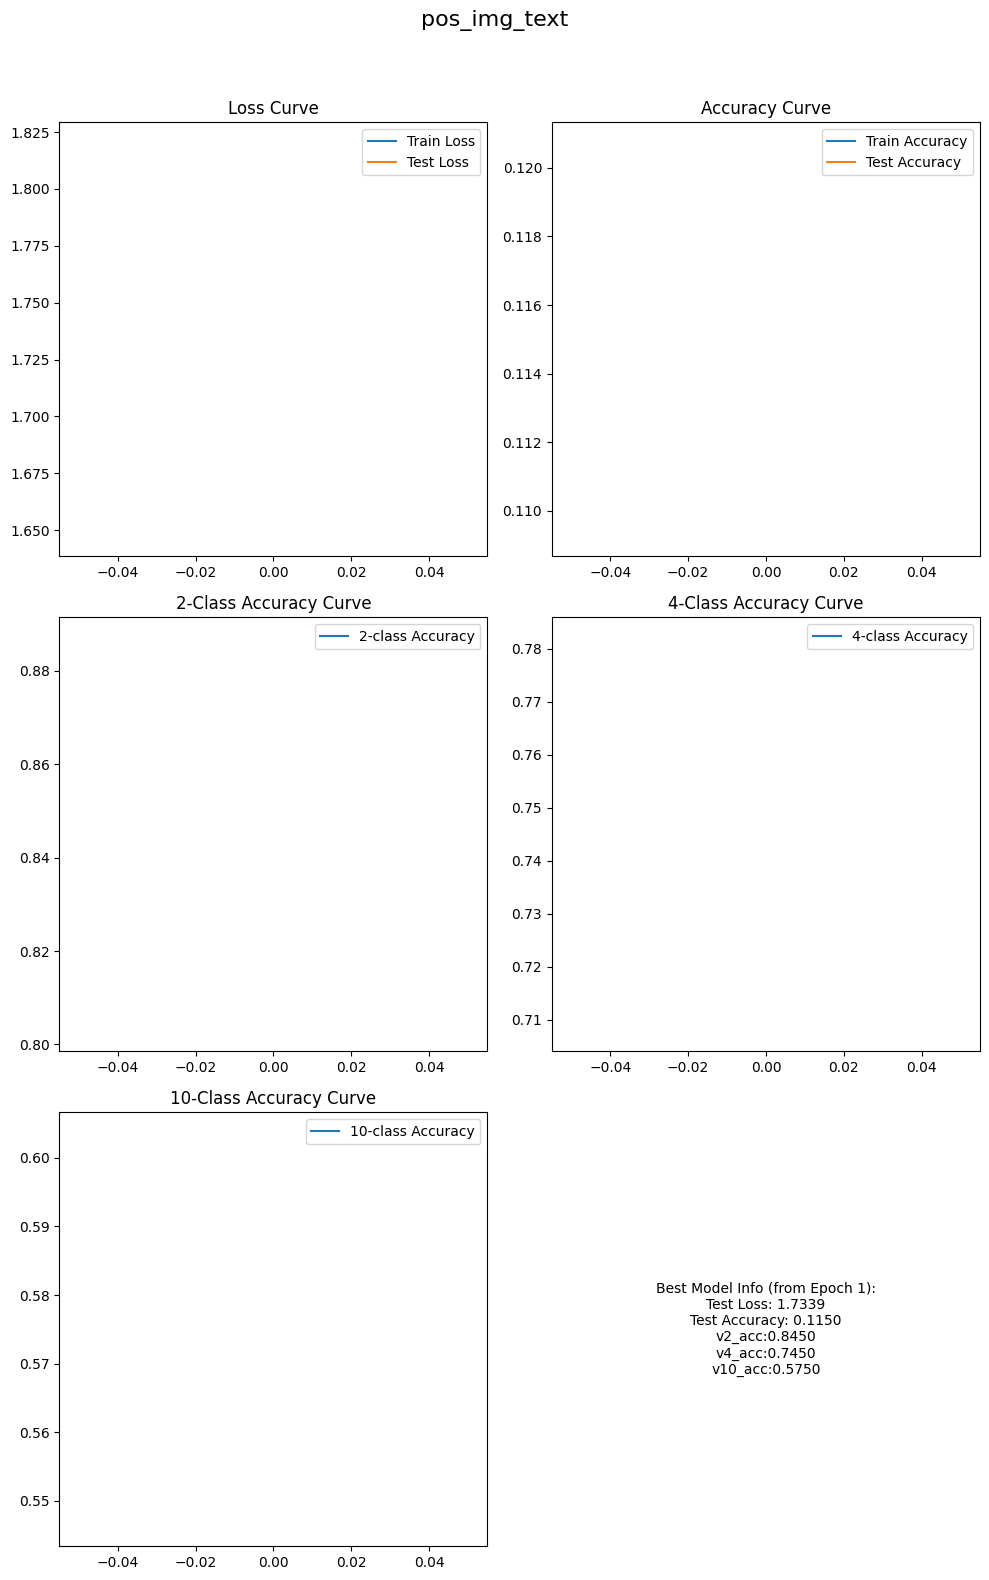

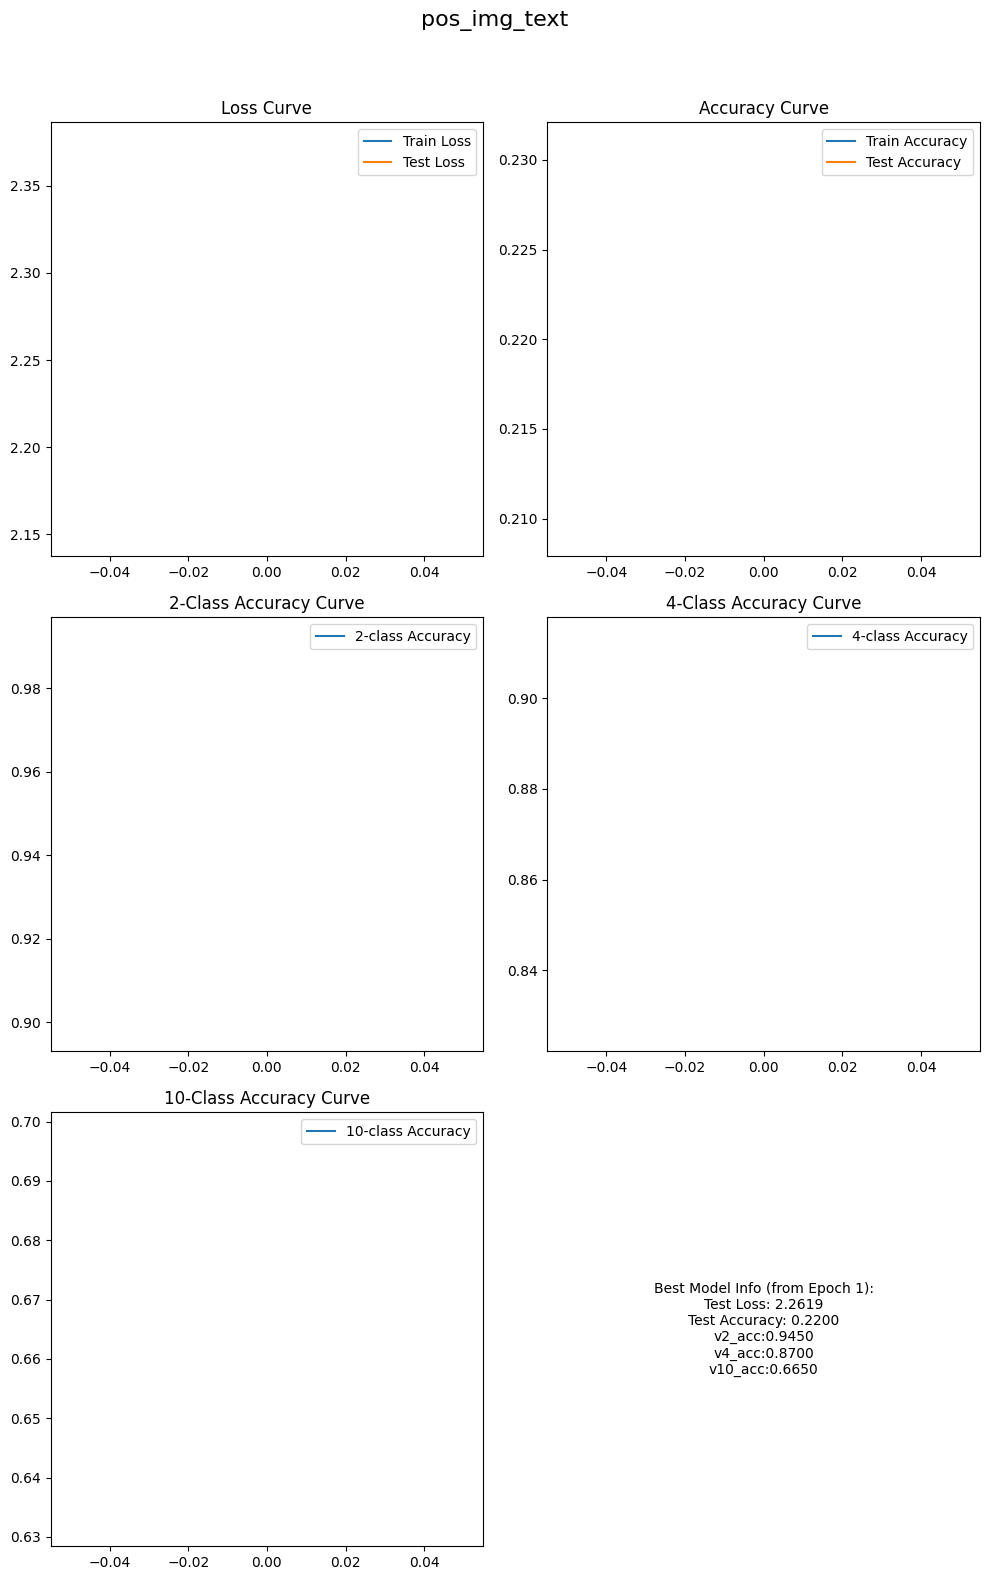

In [1]:
import os

import torch
import torch.optim as optim
from torch.nn import CrossEntropyLoss
from torch.nn import functional as F
from torch.optim import Adam
from torch.utils.data import DataLoader

os.environ["WANDB_API_KEY"] = "KEY"
os.environ["WANDB_MODE"] = 'offline'
from itertools import combinations

import clip
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torchvision.transforms as transforms
import tqdm
from eegdatasets_leaveone_measure import EEGDataset
from eegencoder import eeg_encoder
from einops.layers.torch import Rearrange, Reduce
from lavis.models.clip_models.loss import ClipLoss
from sklearn.metrics import confusion_matrix
from torch.utils.data import DataLoader, Dataset
import random
from utils import wandb_logger
from braindecode.models import EEGNetv4, ATCNet, EEGConformer, EEGITNet, ShallowFBCSPNet
import csv
from torch import Tensor
import itertools
import math
import datetime

from braindecode.models import EEGNetv4, ATCNet, EEGConformer, EEGITNet, ShallowFBCSPNet
import csv
device = torch.device('cuda:3' if torch.cuda.is_available() else 'cpu')

class EEGNetv4_Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.device = device
        self.shape = (63, 250)
        self.eegnet = EEGNetv4(
            in_chans=self.shape[0],
            n_classes=1024,
            input_window_samples=self.shape[1],
            final_conv_length='auto',
            pool_mode='mean',
            F1=8,
            D=20,
            F2=160,
            kernel_length=4,
            third_kernel_size=(4, 2),
            drop_prob=0.25
        )
        self.logit_scale = nn.Parameter(torch.ones([]) * np.log(1 / 0.07))
        self.loss_func = ClipLoss()
    def forward(self, data):
        data = data.unsqueeze(0)
        data = data.reshape(data.shape[1], data.shape[2], data.shape[3], data.shape[0])
        # print(data.shape)
        prediction = self.eegnet(data)
        return prediction
      

def train_model(eegmodel, imgmodel, dataloader, optimizer, device, text_features_all, img_features_all):
    eegmodel.train()
    text_features_all = text_features_all.to(device).float() # (n_cls, d)
    img_features_all = (img_features_all[::10]).to(device).float()
    total_loss = 0
    correct = 0
    total = 0
    alpha=0.9
    features_list = []  # List to store features
    save_features= True
    ridge_lambda = 0.1
    mse_loss_fn = nn.MSELoss()
    for batch_idx, (eeg_data, labels, text, text_features, img, img_features) in enumerate(dataloader):
        eeg_data = eeg_data.to(device)
        text_features = text_features.to(device).float()
        img_features = img_features.to(device).float()
        labels = labels.to(device)
        
        optimizer.zero_grad()
        eeg_features = eegmodel(eeg_data)
        # img_features_outputs = regression(eeg_features).float()
        features_list.append(eeg_features)
        logit_scale = eegmodel.logit_scale
        img_loss = eegmodel.loss_func(eeg_features, img_features, logit_scale)
        text_loss = eegmodel.loss_func(eeg_features, text_features, logit_scale)
        contrastive_loss = img_loss
        # print("text_loss", text_loss)
        # print("img_loss", img_loss)
        
        regress_loss =  mse_loss_fn(eeg_features, img_features)
        # l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
        # loss = (regress_loss + ridge_lambda * l2_norm)       
        loss = (alpha * regress_loss *10 + (1 - alpha) * contrastive_loss*10)
        loss.backward()
        
        optimizer.step()
        total_loss += loss.item()
        
        # logits = logit_scale * eeg_features @ text_features_all.T # (n_batch, n_cls)

        logits_img = logit_scale * eeg_features @ img_features_all.T
        # logits_text = logit_scale * eeg_features @ text_features_all.T
        # logits_single = (logits_text + logits_img) / 2.0        
        # logits_text = logit_scale * eeg_features @ text_features_all.T
        logits_single = logits_img
        predicted = torch.argmax(logits_single, dim=1) # (n_batch, ) \in {0, 1, ..., n_cls-1}

        batch_size = predicted.shape[0]
        total += batch_size
        correct += (predicted == labels).sum().item()

    average_loss = total_loss / (batch_idx+1)
    accuracy = correct / total
    return average_loss, accuracy

def evaluate_model(eegmodel, imgmodel, dataloader, device, text_features_all, img_features_all, generated_features_all, k):
    eegmodel.eval()
    text_features_all = text_features_all.to(device).float()
    img_features_all = img_features_all.to(device).float()
    total_loss = 0
    correct = 0
    total = 0
    alpha =0.9
    top5_correct = 0
    top5_correct_count = 0

    all_labels = set(range(text_features_all.size(0)))
    top5_acc = 0
    mse_loss_fn = nn.MSELoss()
    ridge_lambda = 0.1
    with torch.no_grad():
        for batch_idx, (eeg_data, labels, text, text_features, img, img_features) in enumerate(dataloader):
            eeg_data = eeg_data.to(device)    
            
            text_features = text_features.to(device).float()
            labels = labels.to(device)
            img_features = img_features.to(device).float()
            eeg_features = eegmodel(eeg_data)
            logit_scale = eegmodel.logit_scale                    
            regress_loss =  mse_loss_fn(eeg_features, img_features)
            # print("eeg_features", eeg_features.shape)
            # print(torch.std(eeg_features, dim=-1))
            # print(torch.std(img_features, dim=-1))
            # l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            # loss = (regress_loss + ridge_lambda * l2_norm)       
            img_loss = eegmodel.loss_func(eeg_features, img_features, logit_scale)
            text_loss = eegmodel.loss_func(eeg_features, text_features, logit_scale)
            contrastive_loss = img_loss
            # loss = img_loss + text_loss

            regress_loss =  mse_loss_fn(eeg_features, img_features)
            # print("text_loss", text_loss)
            # print("img_loss", img_loss)
            # print("regress_loss", regress_loss)            
            # l2_norm = sum(p.pow(2.0).sum() for p in model.parameters())
            # loss = (regress_loss + ridge_lambda * l2_norm)       
            loss = alpha * regress_loss *10 + (1 - alpha) * contrastive_loss*10
            # print("loss", loss)
            total_loss += loss.item()
            
            for idx, label in enumerate(labels):

                possible_classes = list(all_labels - {label.item()})
                selected_classes = random.sample(possible_classes, k-1) + [label.item()]
                selected_img_features = generated_features_all[::10][selected_classes]
                # selected_img_features = img_features_all[selected_classes]
                selected_text_features = text_features_all[selected_classes]
                
                if k==200:

                    logits_img = logit_scale * eeg_features[idx] @ selected_img_features.T
                    logits_single = logits_img
                    # print("logits_single", logits_single.shape)

                    # predicted_label = selected_classes[torch.argmax(logits_single).item()]
                    predicted_label = selected_classes[torch.argmax(logits_single).item()] # (n_batch, ) \in {0, 1, ..., n_cls-1}
                    if predicted_label == label.item():
                        # print("predicted_label", predicted_label)
                        correct += 1
                    



                    # print("logits_single", logits_single)
                    _, top5_indices = torch.topk(logits_single, 5, largest =True)
                                                           

                    if label.item() in [selected_classes[i] for i in top5_indices.tolist()]:                
                        top5_correct_count+=1                                
                    total += 1
                elif k==2 or k==4 or k==10:

                    logits_img = logit_scale * eeg_features[idx] @ selected_img_features.T
                    # logits_text = logit_scale * eeg_features[idx] @ selected_text_features.T
                    # logits_single = (logits_text + logits_img) / 2.0
                    logits_single = logits_img
                    # print("logits_single", logits_single.shape)

                    # predicted_label = selected_classes[torch.argmax(logits_single).item()]
                    predicted_label = selected_classes[torch.argmax(logits_single).item()] # (n_batch, ) \in {0, 1, ..., n_cls-1}
                    if predicted_label == label.item():
                        correct += 1
                    total += 1
                else:
                    print("Error.")
                    
    # print("total_loss", total_loss)
    # print("batch_idx+1", batch_idx+1)                
    average_loss = total_loss / (batch_idx+1)
    accuracy = correct / total
    top5_acc = top5_correct_count / total
    return average_loss, accuracy, top5_acc

def main_train_loop(sub, eeg_model, img_model, train_dataloader, test_dataloader, optimizer, device, 
                    text_features_train_all, text_features_test_all, img_features_train_all, img_features_test_all, generated_features_all, config, logger=None):
    logger = wandb_logger(config) if logger else None
    logger.watch(eeg_model,logger) 

    train_losses, train_accuracies = [], []
    test_losses, test_accuracies = [], []
    v2_accs = []
    v4_accs = []
    v10_accs = []

    best_accuracy = 0.0
    best_model_weights = None
    best_epoch_info = {}
    results = []  # List to store results for each epoch
  
    for epoch in range(config['epochs']):

        # train_loss, train_accuracy = train_model(eeg_model, img_model, train_dataloader, optimizer, device, text_features_train_all, img_features_train_all)
        # if (epoch +1) % 5 == 0:               
        #     if config['insubject']==True:       
        #         os.makedirs(f"./models/contrast/{config['encoder_type']}/{sub}/{current_time}", exist_ok=True)             
        #         file_path = f"./models/contrast/{config['encoder_type']}/{sub}/{current_time}/{epoch+1}.pth"
        #         torch.save(eeg_model.state_dict(), file_path)            
        #     else:                
        #         os.makedirs(f"./models/contrast/across/{config['encoder_type']}/{current_time}", exist_ok=True)             
        #         file_path = f"./models/contrast/across/{config['encoder_type']}/{current_time}/{epoch+1}.pth"
        #         torch.save(eeg_model.state_dict(), file_path)
        #     print(f"model saved in {file_path}!")
        # eeg_model.load_state_dict(torch.load(f"/home/ldy/Workspace/BrainAligning_retrieval/models/contrast/NICE/{sub}/40.pth", map_location=device))
        import os
        import glob
        import torch
        from datetime import datetime


        # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



        sub_path = f"/home/ldy/Workspace/BrainAligning_retrieval/models/contrast/EEGNetv4_Encoder/{sub}"


        time_folders = glob.glob(os.path.join(sub_path, "*/"))
        if not time_folders:
            raise ValueError(f"No time-named folders found in {sub_path}")


        def parse_folder_time(folder_name):

            try:
                return datetime.strptime(os.path.basename(os.path.normpath(folder_name)), "%m-%d_%H-%M")
            except ValueError:
                return None


        parsed_folders = [(folder, parse_folder_time(folder)) for folder in time_folders]
        parsed_folders = [pf for pf in parsed_folders if pf[1] is not None]


        if not parsed_folders:
            raise ValueError(f"No folders with valid time format found in {sub_path}")


        latest_folder = max(parsed_folders, key=lambda x: x[1])[0]


        final_path = os.path.join(latest_folder, "40.pth")
        if not os.path.exists(final_path):
            raise FileNotFoundError(f"File {final_path} does not exist")


        eeg_model.load_state_dict(torch.load(final_path, map_location=device))

        eeg_model = eeg_model.to(device)
        generated_features_all = generated_features_all.to(device)
        img_model = None
        # eegmodel.eval()
        test_loss, test_accuracy, top5_acc = evaluate_model(eeg_model, img_model, test_dataloader, device, text_features_test_all, img_features_test_all, generated_features_all, k=200)
        _, v2_acc, _ = evaluate_model(eeg_model, img_model, test_dataloader, device, text_features_test_all, img_features_test_all, generated_features_all, k = 2)
        _, v4_acc, _ = evaluate_model(eeg_model, img_model, test_dataloader, device, text_features_test_all, img_features_test_all, generated_features_all, k = 4)
        _, v10_acc, _ = evaluate_model(eeg_model, img_model, test_dataloader, device, text_features_test_all, img_features_test_all, generated_features_all, k = 10)
        test_losses.append(test_loss)
        test_accuracies.append(test_accuracy)
        v2_accs.append(v2_acc)
        v4_accs.append(v4_acc)
        v10_accs.append(v10_acc)
        # Append results for this epoch
        epoch_results = {
        "epoch": epoch + 1,
        # "train_loss": train_loss,
        # "train_accuracy": train_accuracy,
        "test_loss": test_loss,
        "test_accuracy": test_accuracy,
        "v2_acc": v2_acc,
        "v4_acc": v4_acc,
        "v10_acc": v10_acc,
        "top5_acc":top5_acc
        }
        results.append(epoch_results)

        if test_accuracy > best_accuracy:
            best_accuracy = test_accuracy
            # best_model_weights = model.state_dict().copy()
            
            best_epoch_info = {
                "epoch": epoch + 1,
                # "train_loss": train_loss,
                # "train_accuracy": train_accuracy,
                "test_loss": test_loss,
                "test_accuracy": test_accuracy,
                "v2_acc":v2_acc,
                "v4_acc":v4_acc,
                "v10_acc":v10_acc
            }
        logger.log({
            # "Train Loss": train_loss,
            # "Train Accuracy": train_accuracy,
            "Test Loss": test_loss,
            "Test Accuracy": test_accuracy,
            "v2 Accuracy": v2_acc,
            "v4 Accuracy": v4_acc,
            "v10 Accuracy": v10_acc,
            "Epoch": epoch
        })

        print(f"Epoch {epoch + 1}/{config['epochs']} - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Top5 Accuracy: {top5_acc:.4f}")
        print(f"Epoch {epoch + 1}/{config['epochs']} - v2 Accuracy:{v2_acc} - v4 Accuracy:{v4_acc} - v10 Accuracy:{v10_acc}")
  

    # model.load_state_dict(best_model_weights)


    # torch.save(model.state_dict(), '{train_pos_img_text}.pth')


    fig, axs = plt.subplots(3, 2, figsize=(10, 15))


    axs[0, 0].plot(train_losses, label='Train Loss')
    axs[0, 0].plot(test_losses, label='Test Loss')
    axs[0, 0].legend()
    axs[0, 0].set_title("Loss Curve")


    axs[0, 1].plot(train_accuracies, label='Train Accuracy')
    axs[0, 1].plot(test_accuracies, label='Test Accuracy')
    axs[0, 1].legend()
    axs[0, 1].set_title("Accuracy Curve")



    axs[1, 0].plot(v2_accs, label='2-class Accuracy')
    axs[1, 0].legend()
    axs[1, 0].set_title("2-Class Accuracy Curve")


    axs[1, 1].plot(v4_accs, label='4-class Accuracy')
    axs[1, 1].legend()
    axs[1, 1].set_title("4-Class Accuracy Curve")


    axs[2, 0].plot(v10_accs, label='10-class Accuracy')
    axs[2, 0].legend()
    axs[2, 0].set_title("10-Class Accuracy Curve")


    info_text = (f"Best Model Info (from Epoch {best_epoch_info['epoch']}):\n"
                # f"Train Loss: {best_epoch_info['train_loss']:.4f}\n"
                # f"Train Accuracy: {best_epoch_info['train_accuracy']:.4f}\n"
                f"Test Loss: {best_epoch_info['test_loss']:.4f}\n"
                f"Test Accuracy: {best_epoch_info['test_accuracy']:.4f}\n"
                f"v2_acc:{best_epoch_info['v2_acc']:.4f}\n"
                f"v4_acc:{best_epoch_info['v4_acc']:.4f}\n"
                f"v10_acc:{best_epoch_info['v10_acc']:.4f}")

    axs[2, 1].axis('off')  
    axs[2, 1].text(0.5, 0.5, info_text, fontsize=10, ha='center', va='center', transform=axs[2, 1].transAxes)

    plt.tight_layout()


    plt.suptitle('pos_img_text', fontsize=16, y=1.05)
    plt.savefig('pos_img_text')
    logger.finish()
    return results


def main():
    Encoder_list = ['EEGNetv4_Encoder', 'ATCNet_Encoder', 'EEGConformer_Encoder', 'EEGITNet_Encoder', 'ShallowFBCSPNet_Encoder'] 
    config = {
    "data_path": "/home/ldy/Workspace/THINGS/Preprocessed_data_250Hz",
    "project": "train_pos_img_text_rep",
    "entity": "sustech_rethinkingbci",
    "name": "lr=3e-4_img_pos_pro_eeg",
    "lr": 3e-4,
    "epochs": 1,
    "batch_size": 1024,
    "logger": True,
    "insubject": True,
    "encoder_type": 'EEGNetv4_Encoder',
    "img_encoder": 'Proj_img'
    }

    device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
    subjects = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09', 'sub-10']
    
    for sub in subjects:                    
        # Instantiate a new model for each subject
        eeg_model = globals()[config['encoder_type']]()
        eeg_model.to(device)

        # Reinitialize the optimizer for the new model
        optimizer = torch.optim.AdamW(eeg_model.parameters(), lr=config['lr'])

        if config['insubject']:
            train_dataset = EEGDataset(config['data_path'], subjects=[sub], train=True)
            test_dataset = EEGDataset(config['data_path'], subjects=[sub], train=False)
        else:
            train_dataset = EEGDataset(config['data_path'], exclude_subject=sub, train=True)
            test_dataset = EEGDataset(config['data_path'], exclude_subject=sub, train=False)

        train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, num_workers=0, drop_last=True) if not config['insubject'] else None
        test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True, num_workers=0, drop_last=True)

        text_features_train_all = train_dataset.text_features if not config['insubject'] else None
        img_features_train_all = train_dataset.img_features if not config['insubject'] else None
        text_features_test_all = test_dataset.text_features
        img_features_test_all = test_dataset.img_features        
        generated_features_all = test_dataset.generated_features

        results = main_train_loop(sub, eeg_model, None, train_loader, test_loader, optimizer, device, 
                                  text_features_train_all, text_features_test_all, 
                                  img_features_train_all, img_features_test_all, 
                                  generated_features_all, config, logger=config['logger'])

        # Save results to a CSV file
        results_file = f'./generation_metric_outputs/{config["encoder_type"]}_{"in" if config["insubject"] else "cross_exclude_"}{sub}.csv'
        with open(results_file, 'w', newline='') as file:
            writer = csv.DictWriter(file, fieldnames=results[0].keys())
            writer.writeheader()
            writer.writerows(results)
        print(f'Results saved to {results_file}')

            
if __name__ == '__main__':
    main()